In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir = 'C:/Users/gayathri.katta/Desktop/Computer_Aided_Diagnosis_for _respiratory_illenss/dataset/train'
test_dir='C:/Users/gayathri.katta/Desktop/Computer_Aided_Diagnosis_for _respiratory_illenss/dataset/test'

In [21]:
batch_size = 1
epochs = 15
img_height = 180
img_width = 180

In [18]:
train_dir = 'C:/Users/gayathri.katta/Desktop/lung disease project/dataset/train'


In [22]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 771 images belonging to 4 classes.


In [23]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 304 images belonging to 4 classes.


In [24]:
from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50, VGG19, MobileNetV2

In [25]:
 base_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))




58889256/58889256 [==============================] - 17s 0us/step


In [26]:
base_model.trainable = False

In [27]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [28]:
classifier=tf.keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(4,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 4)                 51204     
                                                                 
Total params: 14765892 (56.33 MB)
Trainable params: 51204 (200.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [29]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = classifier.fit(train_data_gen, epochs=3,
validation_data= val_data_gen,)

Epoch 1/3


771/771 [==============================] - 132s 169ms/step - loss: 0.5780 - accuracy: 0.7886 - val_loss: 0.1830 - val_accuracy: 0.9178
Epoch 2/3
771/771 [==============================] - 128s 166ms/step - loss: 0.2156 - accuracy: 0.9274 - val_loss: 0.1043 - val_accuracy: 0.9605
Epoch 3/3
771/771 [==============================] - 126s 163ms/step - loss: 0.2476 - accuracy: 0.9313 - val_loss: 0.1615 - val_accuracy: 0.9408


In [31]:
classifier.save('lung.h5')

C:\Users\gayathri.katta\AppData\Local\miniconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
#pip install Pillow

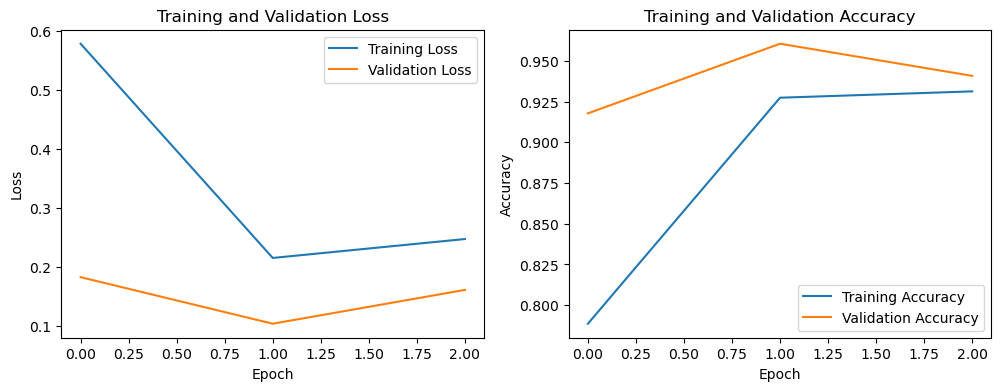

In [36]:
import matplotlib.pyplot as plt

# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


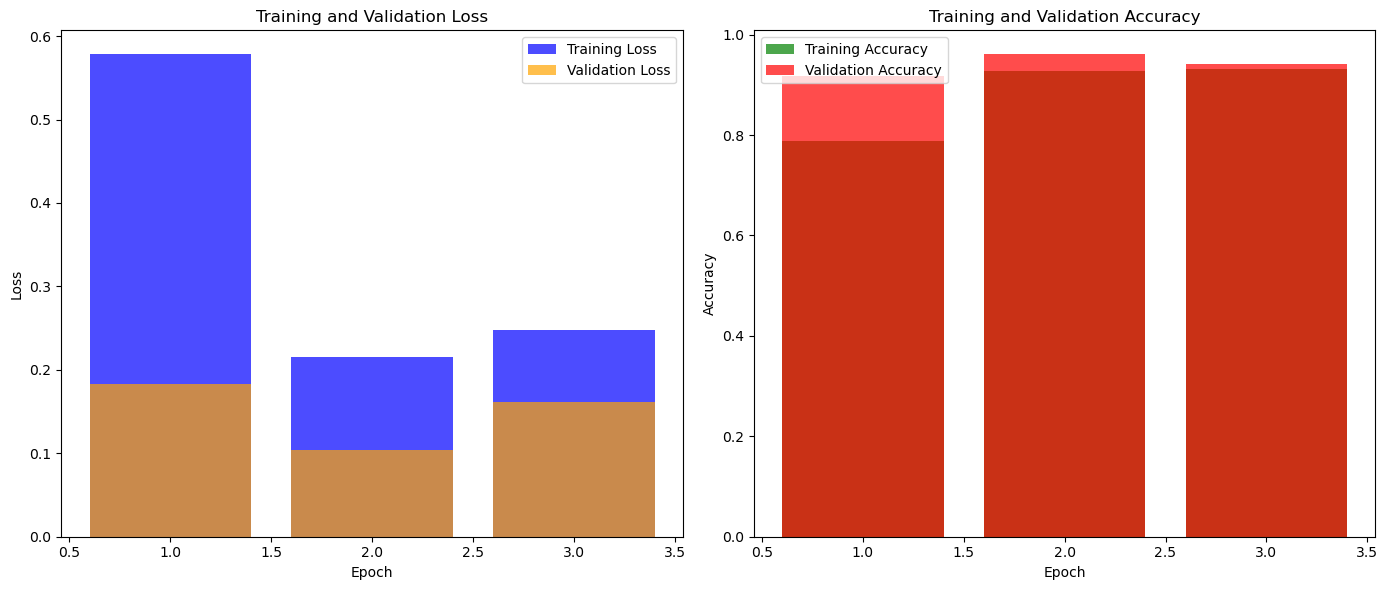

In [38]:
import matplotlib.pyplot as plt

# Access training history
epochs = range(1, len(history.history['accuracy']) + 1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training history as bar graphs
plt.figure(figsize=(14, 6))

# Training and Validation Loss
plt.subplot(1, 2, 1)
plt.bar(epochs, training_loss, label='Training Loss', color='blue', alpha=0.7)
plt.bar(epochs, validation_loss, label='Validation Loss', color='orange', alpha=0.7)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.bar(epochs, training_accuracy, label='Training Accuracy', color='green', alpha=0.7)
plt.bar(epochs, validation_accuracy, label='Validation Accuracy', color='red', alpha=0.7)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
import numpy as np

In [39]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

304/304 - 35s - 35s/epoch - 114ms/step


In [41]:
import matplotlib.pyplot as plt

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

304/304 [==============================] - 36s 119ms/step


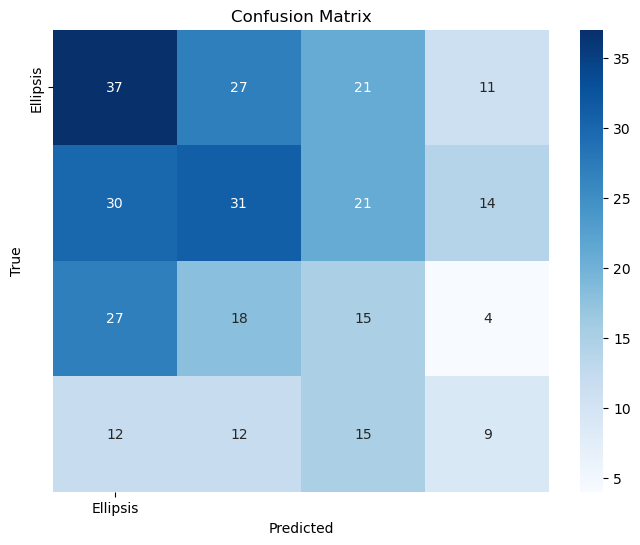

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming you have a validation data generator (val_data_gen)
predictions = classifier.predict(val_data_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_data_gen.classes

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[...], yticklabels=[...])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [44]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [23]:
cm_plot_labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

Confusion matrix, without normalization
[[96  0  0  0]
 [ 0 84 12  0]
 [ 0  1 63  0]
 [13  0  0 35]]
Accuracy: 0.914
Precision: 0.919
Recall: 0.914
F-Measure: 0.914


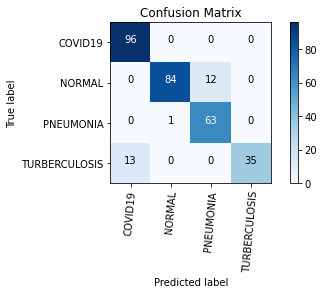

In [24]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred